# Model for detecting Human, Object, Animal, Fruit or Vegetable

In [23]:
!pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl (413 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl (938 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)
  Using cached google_auth_oauthlib-1.2.1-py2.py3-none-any.whl (24 kB)
  Using cached google_auth-2.36.0-py2.py3-none-any.whl (209 kB)
  Using cached pyasn1_modules-0.4.1-py3-none-any.whl (181 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl (9.5 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl (24 kB)
  Using cached pyasn1-0.6.1-py3-none-any.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\LENOVO\\Desktop\\python_work\\ml_works\\Object Detection\\env_3.10\\Lib\\site-packages\\~rapt\\_wrappers.cp310-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import zipfile
import os
import random
import pathlib


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub

In [2]:
!nvidia-smi

Thu Dec  5 12:11:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.70                 Driver Version: 537.70       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P0              23W /  80W |      0MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
tf.__version__

'2.15.0'

In [ ]:
zipdir = zipfile.ZipFile("/content/drive/MyDrive/Ai_Ml_data/Object Detection/train.zip")
zipdir.extractall()
zipdir.close()

In [ ]:
zipdir = zipfile.ZipFile("/content/drive/MyDrive/Ai_Ml_data/Object Detection/val.zip")
zipdir.extractall()
zipdir.close()

In [ ]:
zipdir = zipfile.ZipFile("/content/drive/MyDrive/Ai_Ml_data/Object Detection/test.zip")
zipdir.extractall()
zipdir.close()

In [4]:
# Walk throughout the train directory
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in 'train'.
There are 0 directories and 2775 images in 'train\Animal'.
There are 0 directories and 4503 images in 'train\Fruit'.
There are 0 directories and 466 images in 'train\Human'.
There are 0 directories and 20579 images in 'train\Object'.
There are 0 directories and 2314 images in 'train\Vegetable'.


In [4]:
# View random images
def show_random_image(img_dir, target_class):
  img_path_lst = []
  no_of_images = 0

  for dirpath, dirname, filenames in os.walk(img_dir):
    for img_file in filenames:
      img_path = f"{dirpath}/{img_file}"
      img_path_lst.append(img_path)

  no_of_images = len(img_path_lst)

  random_image_number = random.randint(0, no_of_images)
  random_image_path = img_path_lst[random_image_number]

  img = mpimg.imread(random_image_path)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  plt.show()

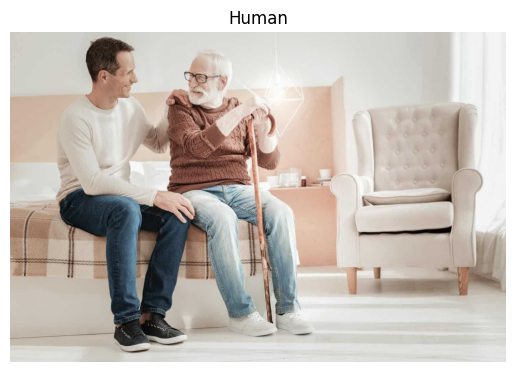

In [5]:
show_random_image('train/Human', 'Human')

In [2]:
IMG_SHAPE = (224, 224)

# Set random seed
tf.random.set_seed(42)

# Augmenting data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=20,
                                          zoom_range=0.2,
                                          shear_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True,
                                          vertical_flip=True)

valid_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup path to our data directory
train_dir = "train"
val_dir = "val"
test_dir = "test"

# Import data from directories and turn it into batches
train_data = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                         batch_size=32,
                                                         target_size=IMG_SHAPE,
                                                         class_mode="categorical",
                                                         seed=42)

val_data = valid_datagen.flow_from_directory(directory=val_dir,
                                             batch_size=32,
                                             target_size=IMG_SHAPE,
                                             class_mode="categorical",
                                             seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=IMG_SHAPE,
                                             class_mode="categorical",
                                             seed=42)

Found 30637 images belonging to 5 classes.
Found 6567 images belonging to 5 classes.
Found 6561 images belonging to 5 classes.


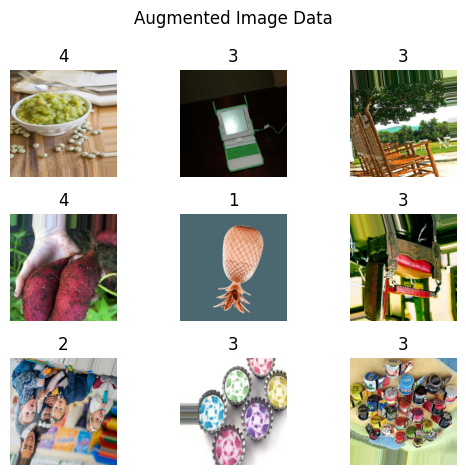

In [3]:
images, labels = next(train_data)

plt.suptitle("Augmented Image Data")

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(images[i])
  plt.title(np.argmax(labels[i]))
  plt.axis(False)
  plt.tight_layout()

In [5]:
num_classes = train_data.num_classes
num_classes

5

In [21]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation="softmax"),
], name="cnn_model")


model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

C:\Users\LENOVO\Desktop\python_work\ml_works\Object Detection\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history_1 = model_1.fit(train_data,
                        steps_per_epoch=int(len(train_data)),
                        epochs=5,
                        validation_data=val_data,
                        validation_steps=int(len(val_data)))

C:\Users\LENOVO\Desktop\python_work\ml_works\Object Detection\Object Detection\od_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
166/958 ━━━━━━━━━━━━━━━━━━━━ 1:00:36 5s/step - accuracy: 0.6605 - loss: 1.1803

C:\Users\LENOVO\Desktop\python_work\ml_works\Object Detection\Object Detection\od_env\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


958/958 ━━━━━━━━━━━━━━━━━━━━ 4349s 5s/step - accuracy: 0.7007 - loss: 0.9093 - val_accuracy: 0.7557 - val_loss: 0.6813
Epoch 2/5
958/958 ━━━━━━━━━━━━━━━━━━━━ 4148s 4s/step - accuracy: 0.7528 - loss: 0.7020 - val_accuracy: 0.7658 - val_loss: 0.6678
Epoch 3/5
958/958 ━━━━━━━━━━━━━━━━━━━━ 4158s 4s/step - accuracy: 0.7592 - loss: 0.6748 - val_accuracy: 0.7705 - val_loss: 0.6659
Epoch 4/5
958/958 ━━━━━━━━━━━━━━━━━━━━ 4371s 5s/step - accuracy: 0.7807 - loss: 0.6241 - val_accuracy: 0.7876 - val_loss: 0.6120
Epoch 5/5
958/958 ━━━━━━━━━━━━━━━━━━━━ 4339s 5s/step - accuracy: 0.7944 - loss: 0.5947 - val_accuracy: 0.8157 - val_loss: 0.5221


In [11]:
model_1.summary()

Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 179776)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         898,885 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,034,385 (11.58 MB)

 Trainable params: 1,011,461 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,022,924 (7.72 MB)

In [13]:
# Plot graph for accuracy and loss
def plot_model_graph(model_history):
  training_accuracy = model_history.history["accuracy"]
  validation_accuracy = model_history.history["val_accuracy"]
  training_loss = model_history.history["loss"]
  validation_loss = model_history.history["val_loss"]

  epochs = range(1, len(training_accuracy) + 1)

  plt.figure(figsize=(10, 6))
  plt.subplot(2, 2, 1)
  plt.plot(epochs, training_accuracy, label="Training Accuracy")
  plt.plot(epochs, validation_accuracy, label="Validation Accuracy")
  plt.xlabel("Accuracy")
  plt.ylabel("Epochs")
  plt.legend()

  plt.subplot(2, 2, 2)
  plt.plot(epochs, training_loss, label="Training Loss")
  plt.plot(epochs, validation_loss, label="Validation Loss")
  plt.xlabel("Loss")
  plt.ylabel("Epochs")
  plt.legend()

  plt.tight_layout()

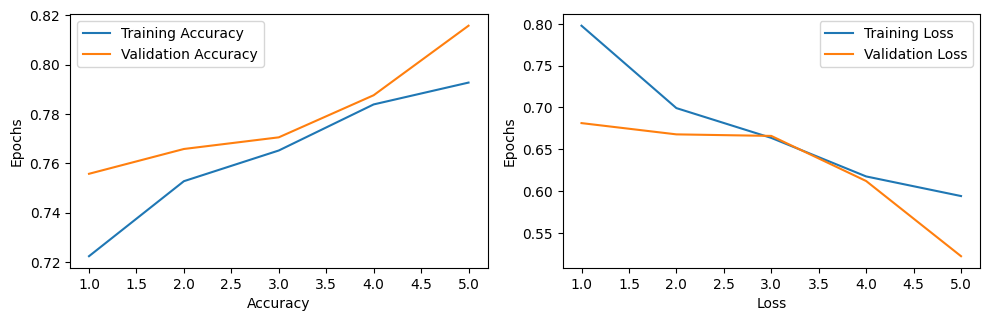

In [13]:
plot_model_graph(history_1)

In [18]:
model_1.evaluate(test_data)

206/206 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.8209 - loss: 0.5209


[0.5191214084625244, 0.8186252117156982]

## Using Transfer Learning for Training Model

In [6]:
mobilenet_v2_url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/100-224-classification/2"
resnet_v2_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/101-classification/2"
efficientnet_v2_url = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-classification/2"

In [7]:
def create_model(model_url, num_classes=5):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape=IMG_SHAPE + (3,))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

In [9]:
model_2 = create_model(mobilenet_v2_url, num_classes)

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [10]:
history_2 = model_2.fit(train_data,
                        steps_per_epoch=len(train_data),
                        epochs=5,
                        validation_data=val_data,
                        validation_steps=len(val_data))

Epoch 1/5



121/958 [==>...........................] - ETA: 16:20 - loss: 0.5159 - accuracy: 0.8368  

C:\Users\LENOVO\Desktop\python_work\ml_works\Object Detection\env_3.10\lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


958/958 [==============================] - 21094s 22s/step - loss: 0.2292 - accuracy: 0.9282 - val_loss: 0.1640 - val_accuracy: 0.9478
Epoch 2/5
958/958 [==============================] - 854s 891ms/step - loss: 0.1603 - accuracy: 0.9496 - val_loss: 0.1319 - val_accuracy: 0.9603
Epoch 3/5
958/958 [==============================] - 875s 914ms/step - loss: 0.1548 - accuracy: 0.9516 - val_loss: 0.1294 - val_accuracy: 0.9590
Epoch 4/5
958/958 [==============================] - 876s 915ms/step - loss: 0.1495 - accuracy: 0.9522 - val_loss: 0.1157 - val_accuracy: 0.9630
Epoch 5/5
958/958 [==============================] - 862s 900ms/step - loss: 0.1469 - accuracy: 0.9535 - val_loss: 0.1130 - val_accuracy: 0.9630


In [11]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1001)              3540265   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 5)                 5010      
                                                                 
Total params: 3545275 (13.52 MB)
Trainable params: 5010 (19.57 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


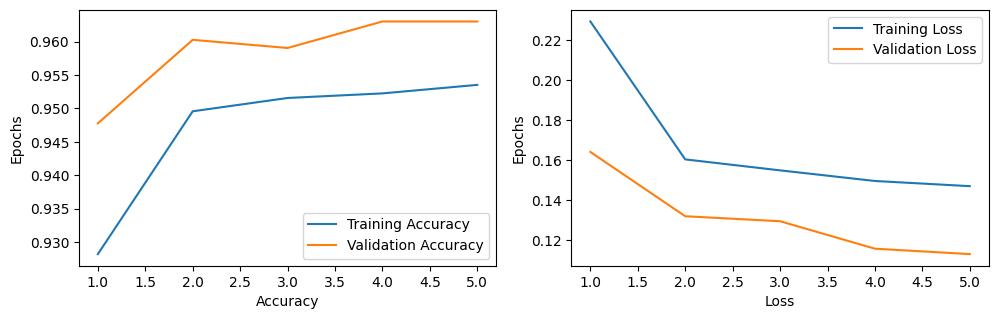

In [14]:
plot_model_graph(history_2)

In [15]:
model_2.evaluate(test_data)

206/206 [==============================] - 151s 733ms/step - loss: 0.1279 - accuracy: 0.9614


[0.12792715430259705, 0.9614388346672058]

In [20]:
train_dir = "train"
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Animal' 'Fruit' 'Human' 'Object' 'Vegetable']


In [23]:
IMG_SIZE = 224
def load_and_pred_images(img_url, IMG_SIZE = 224):
  # Read image
  image = tf.io.read_file(img_url)
  # Decode image
  image = tf.io.decode_image(image)
  # Rescale image
  image = tf.image.resize(image,
                         size=[IMG_SIZE, IMG_SIZE])
  # Resize the image
  image = image/255.

  return image

In [24]:
def pred_and_plot_images(model, img_url, class_names=class_names):
  image = load_and_pred_images(img_url)

  # Make a prediction
  pred = model.predict(tf.expand_dims(image, axis=0))

  pred_class = class_names[tf.argmax(pred[0]).numpy()]

  plt.imshow(image)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 65ms/step


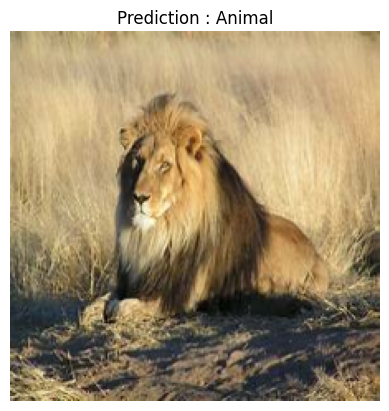

In [108]:
pred_and_plot_images(model_2, 'lion.jpg', class_names);

In [97]:
# Save a model in .h5 format 
model_2.save('tf_image_detection_model.h5')

In [109]:
# Save a model in .keras format 
model_2.save('tf_image_detection_model.keras')

In [110]:
# Load a trained model and evaluate it

loaded_model_2 = tf.keras.models.load_model(
    "tf_image_detection_model.keras",
    custom_objects={'KerasLayer': hub.KerasLayer}
)

In [111]:
loaded_model_2.evaluate(test_data)

206/206 [==============================] - 86s 411ms/step - loss: 0.1279 - accuracy: 0.9614


[0.12792716920375824, 0.9614388346672058]

In [112]:
model_2.evaluate(test_data)

206/206 [==============================] - 83s 403ms/step - loss: 0.1279 - accuracy: 0.9614


[0.12792712450027466, 0.9614388346672058]